### 读取数据

In [3]:
import pandas as pd
import numpy as np

# 指定csv中的分隔符是逗号
data = pd.read_csv("./Data/insurance.csv",sep=",")
data.head(n=6)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


### EDA数据探索

(array([ 46., 105., 101., 155., 198., 283., 156., 123., 115.,  56.]),
 array([ 7.02275569,  7.42678461,  7.83081352,  8.23484244,  8.63887136,
         9.04290027,  9.44692919,  9.8509581 , 10.25498702, 10.65901594,
        11.06304485]),
 <BarContainer object of 10 artists>)

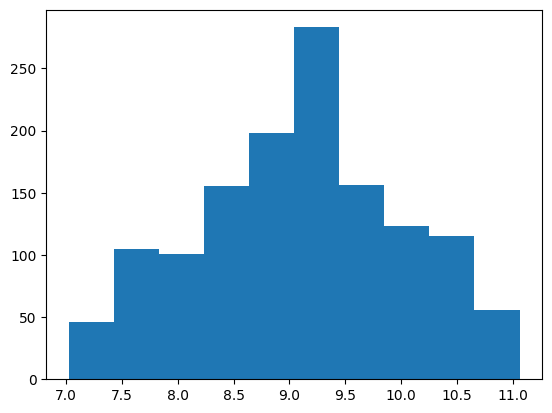

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(np.log(data['charges']))

<Axes: xlabel='charges', ylabel='Density'>

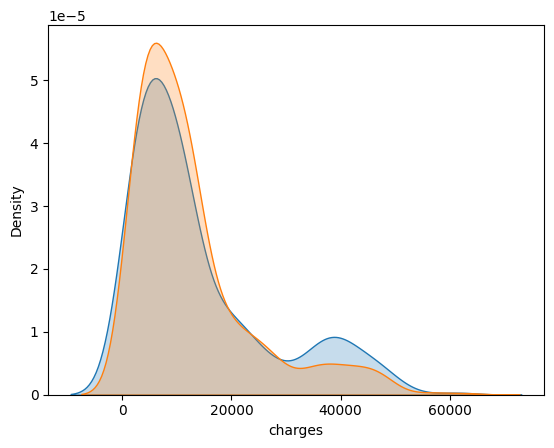

In [5]:
import seaborn as sns
sns.kdeplot(data.loc[data.sex=='male','charges'],fill=True,label='male')
sns.kdeplot(data.loc[data.sex=='female','charges'],fill=True,label='female')

<Axes: xlabel='charges', ylabel='Density'>

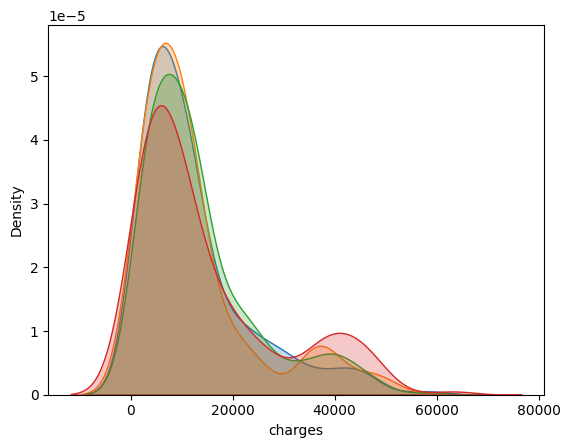

In [6]:
sns.kdeplot(data.loc[data.region=='northwest','charges'],fill=True,label='northwest')
sns.kdeplot(data.loc[data.region=='southwest','charges'],fill=True,label='southwest')
sns.kdeplot(data.loc[data.region=='northeast','charges'],fill=True,label='northeast')
sns.kdeplot(data.loc[data.region=='southeast','charges'],fill=True,label='southeast')

<Axes: xlabel='charges', ylabel='Density'>

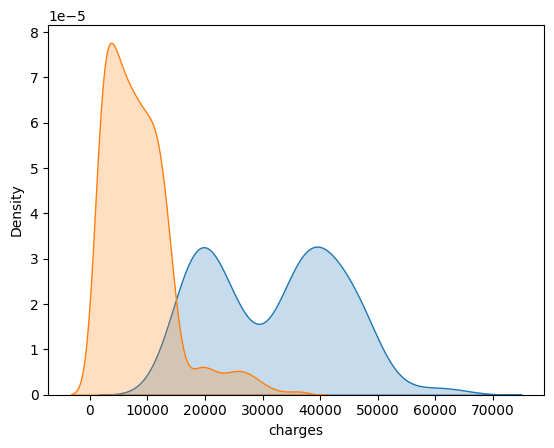

In [7]:
sns.kdeplot(data.loc[data.smoker=='yes','charges'],fill=True,label='yes')
sns.kdeplot(data.loc[data.smoker=='no','charges'],fill=True,label='no')

<Axes: xlabel='charges', ylabel='Density'>

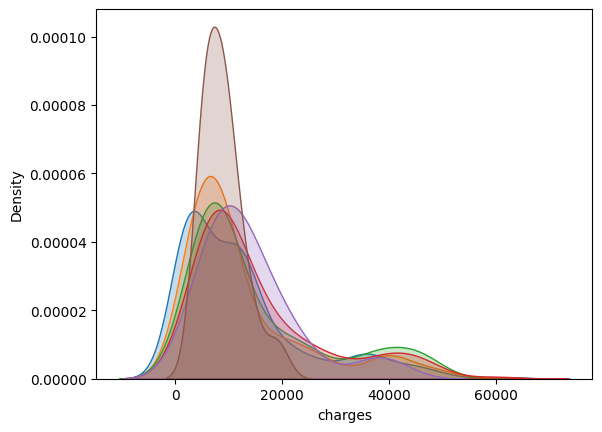

In [9]:
sns.kdeplot(data.loc[data.children==0,'charges'],fill=True,label='children0')
sns.kdeplot(data.loc[data.children==1,'charges'],fill=True,label='children1')
sns.kdeplot(data.loc[data.children==2,'charges'],fill=True,label='children2')
sns.kdeplot(data.loc[data.children==3,'charges'],fill=True,label='children3')
sns.kdeplot(data.loc[data.children==4,'charges'],fill=True,label='children4')
sns.kdeplot(data.loc[data.children==5,'charges'],fill=True,label='children5')

### 特征工程

In [11]:
data = data.drop(['region','sex'],axis=1)
data.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520


In [12]:
def greater(df,bmi,num_child):
    df['bmi']='over' if df['bmi']>=bmi else 'under'
    df['children']='no' if df['children'] == num_child else 'yes'
    return df

data = data.apply(greater,axis=1,args=(30,0))
data.head()

,age,bmi,children,smoker,charges
0,19,under,no,yes,16884.92400
1,18,over,yes,no,1725.55230
2,28,over,yes,no,4449.46200
3,33,under,no,no,21984.47061
4,32,under,no,no,3866.85520


In [13]:
data = pd.get_dummies(data)
data.head()

,age,charges,bmi_over,bmi_under,children_no,children_yes,smoker_no,smoker_yes
0,19,16884.92400,False,True,True,False,False,True
1,18,1725.55230,True,False,False,True,True,False
2,28,4449.46200,True,False,False,True,True,False
3,33,21984.47061,False,True,True,False,True,False
4,32,3866.85520,False,True,True,False,True,False


In [14]:
x = data.drop('charges',axis=1)
y = data['charges']
# 填充数据集中的空值
x.fillna(0,inplace=True)
y.fillna(0,inplace=True)

### 模型训练

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

# 对训练集和测试集进行升维，这里升到2维
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

reg = LinearRegression()

reg.fit(x_train_poly,np.log1p(y_train))
y_predict = reg.predict(x_test_poly)

In [19]:
# 使用岭回归的损失函数
ridge = Ridge()
ridge.fit(x_train_poly,np.log1p(y_train))
y_predict_ridge = ridge.predict(x_test_poly)

In [20]:
booster = GradientBoostingRegressor()
booster.fit(x_train_poly,np.log1p(y_train))
y_predict_boost = booster.predict(x_test_poly)

### 模型评估

In [17]:
from sklearn.metrics import mean_squared_error

log_rmse_train = np.sqrt(mean_squared_error(y_true=np.log1p(y_train),y_pred=reg.predict(x_train_poly)))
log_rmse_test = np.sqrt(mean_squared_error(y_true=np.log1p(y_test),y_pred=y_predict))

log_rmse_train,log_rmse_test

(0.3817754065616365, 0.37669213873273744)

In [21]:
from sklearn.metrics import mean_squared_error

log_rmse_train = np.sqrt(mean_squared_error(y_true=np.log1p(y_train),y_pred=ridge.predict(x_train_poly)))
log_rmse_test = np.sqrt(mean_squared_error(y_true=np.log1p(y_test),y_pred=y_predict_ridge))

log_rmse_train,log_rmse_test

(0.38179388815062826, 0.37681682734403665)

In [22]:
from sklearn.metrics import mean_squared_error

log_rmse_train = np.sqrt(mean_squared_error(y_true=np.log1p(y_train),y_pred=booster.predict(x_train_poly)))
log_rmse_test = np.sqrt(mean_squared_error(y_true=np.log1p(y_test),y_pred=y_predict_boost))

log_rmse_train,log_rmse_test

(0.352407737864297, 0.389303995180795)